# Ujian Tengah Semester

Mata Kuliah Data Sciene

*   Nama: Diah Ayu Puspasari
*   NIM: 0110223052

Data Engineering 02



In [1]:
# import library pandas dan yang lain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/datasciece/dataset'

In [4]:
# membaca file csv dirty data
# pakai encoding 'latin1'
mydata = pd.read_csv(path + '/pakistan_intellectual.csv', encoding='latin1')
mydata

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,NaN,NaN,NaN,"High Performance Computing, Computational Scie...",NaN
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012.0,"Digital Multimedia Systems, Video Compression ...",NaN
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,NaN,Austria,NaN,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",NaN
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,NaN,"Medical Image Processing and Analysis, Digital...",NaN


# Eksplorasi Data

In [5]:
# cek informasi isi data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   S#                                         1981 non-null   int64  
 1   Teacher Name                               1981 non-null   object 
 2   University Currently Teaching              1981 non-null   object 
 3   Department                                 1981 non-null   object 
 4   Province University Located                1981 non-null   object 
 5   Designation                                1918 non-null   object 
 6   Terminal Degree                            1440 non-null   object 
 7   Graduated from                             1142 non-null   object 
 8   Country                                    1200 non-null   object 
 9   Year                                       499 non-null    float64
 10  Area of Specialization/R

In [6]:
# cek statika kkolom
mydata.describe()

,S#,Year
count,1981.000000,499.000000
mean,991.000000,2010.503006
std,572.009761,5.558514
min,1.000000,1983.000000
25%,496.000000,2008.000000
50%,991.000000,2012.000000
75%,1486.000000,2014.000000
max,1981.000000,2018.000000


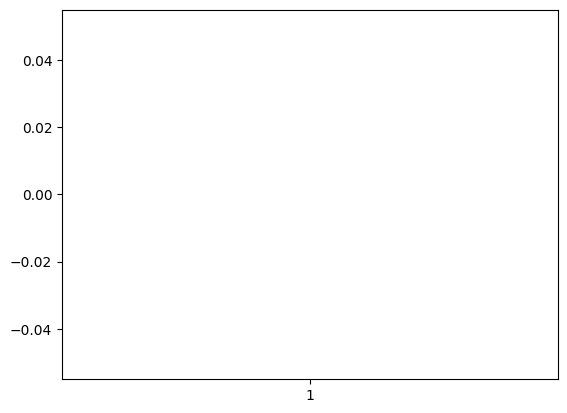

In [7]:
# cek outliers kolom years pada data dan boxplot
plt.boxplot(mydata['Year'])
plt.show()

In [8]:
# cek missing value
mydata.isnull().sum()

,0
S#,0
Teacher Name,0
University Currently Teaching,0
Department,0
Province University Located,0
Designation,63
Terminal Degree,541
Graduated from,839
Country,781
Year,1482


In [9]:
# cek data yang double
mydata.duplicated().sum()

np.int64(0)

In [10]:
# Cek distribusi kolom teks
print(mydata['University Currently Teaching'].value_counts())
print(mydata['Department'].value_counts())
print(mydata['Province University Located'].value_counts())
print(mydata['Designation'].value_counts())
print(mydata['Terminal Degree'].value_counts())

University Currently Teaching
COMSATS, Islamabad Campus                                                                117
Sir Syed University of Engineering and Technology                                         81
University of Lahore-PakPattan                                                            71
Balochistan University of Information Technology, Engineering and Management Sciences     68
Virtual University                                                                        68
                                                                                        ... 
Khadim Ali Shah Bukhari Institute of Technology                                            3
Islamia College Gujranwala                                                                 2
UET-RASUL                                                                                  2
Pir Mehr Ali Shah Arid Agriculture University                                              2
University of Sahiwal                   

## Penjelasan Distribusi Kolom

Kesimpulan Umum:
* Data ini menunjukkan dominan bidang ilmu komputer di universitas yang tercatat, dengan banyak pengajar berasal dari bidang Computer Science dan terkait dengan Teknologi Informasi.

* Universitas yang lebih besar atau terkenal (seperti COMSATS) memiliki lebih banyak pengajar.

* Punjab adalah provinsi dengan jumlah pengajar terbanyak, yang mungkin mencerminkan konsentrasi pendidikan tinggi di wilayah tersebut.

* Mayoritas pengajar memiliki gelar MS atau PhD, yang menunjukkan bahwa pengajar di universitas ini umumnya memiliki latar belakang pendidikan yang tinggi.

In [11]:
# rename nama kolom
mydata.rename(columns={
    'S#': 'Nomor Seri',
    'Teacher Name': 'Nama Pengajar',
    'University Currently Teaching': 'Universitas',
    'Department': 'Departemen',
    'Province University Located': 'Provinsi',
    'Designation': 'Jabatan',
    'Terminal Degree': 'Gelar Tertinggi',
    'Graduated from': 'Lulusan',
    'Country': 'Negara Asal',
    'Year': 'Tahun Lulus',
    'Area of Specialization/Research Interests': 'Bidang Keahlian',
    'Other Information': 'Informasi Tambahan'
}, inplace=True)

mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian,Informasi Tambahan
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,NaN,NaN,NaN,"High Performance Computing, Computational Scie...",NaN
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012.0,"Digital Multimedia Systems, Video Compression ...",NaN
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,NaN,Austria,NaN,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",NaN
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,NaN,"Medical Image Processing and Analysis, Digital...",NaN


In [12]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nomor Seri          1981 non-null   int64  
 1   Nama Pengajar       1981 non-null   object 
 2   Universitas         1981 non-null   object 
 3   Departemen          1981 non-null   object 
 4   Provinsi            1981 non-null   object 
 5   Jabatan             1918 non-null   object 
 6   Gelar Tertinggi     1440 non-null   object 
 7   Lulusan             1142 non-null   object 
 8   Negara Asal         1200 non-null   object 
 9   Tahun Lulus         499 non-null    float64
 10  Bidang Keahlian     750 non-null    object 
 11  Informasi Tambahan  163 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 185.8+ KB


## Penjelasan Data

1.   Nomor Seri (S#): Kolom ini berisi nomor urut atau ID yang unik untuk setiap baris data. Biasanya digunakan sebagai identifier untuk setiap entri.
2.   Nama Pengajar (Teacher Name): Berisi nama pengajar atau dosen yang terdaftar dalam dataset ini.
3. Universitas (University Currently Teaching): Nama universitas tempat pengajar tersebut mengajar saat ini.
4. Departemen (Department): Fakultas atau departemen tempat pengajar tersebut mengajar di universitas yang bersangkutan.
5. Provinsi (Province University Located): Provinsi tempat universitas tersebut berada.
6. Jabatan (Designation): Menyebutkan jabatan atau posisi pengajar di universitas, seperti dosen, profesor, atau posisi akademik lainnya.
7. Gelar Tertinggi (Terminal Degree): Gelar akademik tertinggi yang telah diperoleh oleh pengajar, seperti S3 (Doktor), S2 (Magister), atau gelar lainnya yang relevan.
8. Lulusan (Graduated from): Nama institusi pendidikan tempat pengajar tersebut menyelesaikan pendidikan tertingginya.
9. Negara Asal (Country): Negara tempat pengajar tersebut berasal atau negara asal mereka sebelum berkarir di universitas tempat mereka mengajar.
10. Tahun Lulus (Year): Tahun ketika pengajar tersebut menyelesaikan pendidikan atau memperoleh gelar tertinggi mereka.
11. Bidang Keahlian (Area of Specialization/Research Interests): Kolom ini berisi bidang keahlian atau topik penelitian yang ditekuni oleh pengajar, seperti ilmu komputer, fisika, matematika, dll.
12. Informasi Tambahan (Other Information): Kolom ini berisi informasi tambahan yang relevan, seperti publikasi, proyek penelitian, atau catatan penting lainnya tentang pengajar.

# Cleaning Data

## Menangani Missing Value

In [13]:
# menangani missing value

# Mengisi missing value pada kolom Jabatan dengan mode
mydata['Jabatan'].fillna(mydata['Jabatan'].mode()[0], inplace=True)

# Mengisi missing value pada kolom Gelar Tertinggi dengan mode
mydata['Gelar Tertinggi'].fillna(mydata['Gelar Tertinggi'].mode()[0], inplace=True)

# Mengisi missing value pada kolom Lulusan dengan "Tidak diketahui"
mydata['Lulusan'].fillna('Tidak diketahui', inplace=True)

# Mengisi missing value pada kolom Negara Asal dengan mode
mydata['Negara Asal'].fillna(mydata['Negara Asal'].mode()[0], inplace=True)

# Mengisi missing value pada kolom Tahun Lulus dengan median
mydata['Tahun Lulus'].fillna(mydata['Tahun Lulus'].median(), inplace=True)

# Mengisi missing value pada kolom Bidang Keahlian dengan "Tidak diketahui"
mydata['Bidang Keahlian'].fillna('Tidak diketahui', inplace=True)


<ipython-input-13-399e15575049>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['Jabatan'].fillna(mydata['Jabatan'].mode()[0], inplace=True)
<ipython-input-13-399e15575049>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [14]:
# menghapus kolom informasi tambahan
mydata.drop('Informasi Tambahan', axis=1, inplace=True)

In [15]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nomor Seri       1981 non-null   int64  
 1   Nama Pengajar    1981 non-null   object 
 2   Universitas      1981 non-null   object 
 3   Departemen       1981 non-null   object 
 4   Provinsi         1981 non-null   object 
 5   Jabatan          1981 non-null   object 
 6   Gelar Tertinggi  1981 non-null   object 
 7   Lulusan          1981 non-null   object 
 8   Negara Asal      1981 non-null   object 
 9   Tahun Lulus      1981 non-null   float64
 10  Bidang Keahlian  1981 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 170.4+ KB


In [16]:
mydata.isnull().sum()

,0
Nomor Seri,0
Nama Pengajar,0
Universitas,0
Departemen,0
Provinsi,0
Jabatan,0
Gelar Tertinggi,0
Lulusan,0
Negara Asal,0
Tahun Lulus,0


Terdapat missing value pada kolom Jabatan, Gelar Tertinggi, Lulusan, Negara Asal, Tahun Lulus, Bidang Keahlian dan Informasi tambahan. Ditangani dengan:

1. Jabatan (Designation): Diisi dengan nilai yang paling sering muncul (mode).

2. Gelar Tertinggi (Terminal Degree): Diisi dengan nilai yang paling sering muncul (mode).

3. Lulusan (Graduated from): Diisi dengan teks "Tidak diketahui" karena ini adalah kategori yang tidak diketahui.

4. Negara Asal (Country): Diisi dengan nilai yang paling sering muncul (mode).

5. Tahun Lulus (Year): Diisi dengan nilai median karena kolom ini adalah numerik.

7. Bidang Keahlian (Area of Specialization/Research Interests): Diisi dengan teks "Tidak diketahui" untuk data yang tidak ada informasi.

8. informasi Tambahan: Dihapus karena tidak terlalu dipakai untuk analisis

In [17]:
mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Tidak diketahui,France,2012.0,"P2P Networks, Telecommunication Systems"
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,Tidak diketahui,France,2012.0,"Wireless Networks, Telecommunication Systems, ..."
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012.0,Software Engineering & DBMS
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,Tidak diketahui,Pakistan,2012.0,Operating System & DBMS
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012.0,DBMS
...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Tidak diketahui,Pakistan,2012.0,"High Performance Computing, Computational Scie..."
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012.0,"Digital Multimedia Systems, Video Compression ..."
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Tidak diketahui,Austria,2012.0,"Unmanned Aerial Vehicle (UAV), Multirobot Syst..."
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,2012.0,"Medical Image Processing and Analysis, Digital..."


## Mengubah Tipe Data

In [18]:
# mengubah tipe data Tahun Lulus menjadi int
mydata['Tahun Lulus'] = mydata['Tahun Lulus'].astype(int)

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nomor Seri       1981 non-null   int64 
 1   Nama Pengajar    1981 non-null   object
 2   Universitas      1981 non-null   object
 3   Departemen       1981 non-null   object
 4   Provinsi         1981 non-null   object
 5   Jabatan          1981 non-null   object
 6   Gelar Tertinggi  1981 non-null   object
 7   Lulusan          1981 non-null   object
 8   Negara Asal      1981 non-null   object
 9   Tahun Lulus      1981 non-null   int64 
 10  Bidang Keahlian  1981 non-null   object
dtypes: int64(2), object(9)
memory usage: 170.4+ KB


## Distribusi Kolom

In [20]:
# melihat daftar unik pada kolom Universitas
mydata['Universitas'].unique()

array(['University of Balochistan',
       "Sardar Bahadur Khan Women's University",
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'University of Loralai', 'University of Turbat',
       'COMSATS, Islamabad Campus',
       'National University of Sciences and Technology',
       'RIPHAH International', 'Quaid e Azam University Islamabad',
       'FAST-NU(Islamabad)', 'International Islamic University,Islamabad',
       'National University of Modern Languages', 'Air University',
       'Bahria University,Islamabad',
       'Capital University of Science and Technology',
       'Pakistan Institute of Engineering and Applied Sciences',
       'University of Sargodha,Mandi Bahauddin Campus', 'UET-RASUL',
       'NAML-Mianwali', 'University of Lahore-PakPattan',
       'National College of Business Administration & Economics',
       'University of Sahiwal', 'COMSATS-Vehari',
       'Govt. College Women University,Sialkot',
       'B

### Mengkategorikan Kolom Dapartemen

In [21]:
# melihat daftar unik pada kolom Dapartemen
mydata['Departemen'].unique()

array(['Computer Science & IT', 'Computer Science', 'Computing',
       'Information Technology',
       'Computer Science and Software Engineering',
       'Computer and Information Sciences', 'Computer Science and IT',
       'CS/IT', 'Software Engineering', 'Computer Sciences', 'CS & IT',
       'School of Information and Technology',
       'Computer Science & Engineering',
       'Department of Computer Systems & Software Engineering',
       'Institute of Mathematics & Computer Science',
       'ENGINEERING, SCIENCE & TECHNOLOGY', 'Computer Engineering',
       'Computing & Information Sciences',
       'FACULTY OF COMPUTING & ENGINEERING',
       'Computer Science and Information Technology',
       'Computer Science and Engineering'], dtype=object)

In [22]:
# Buat dictionary mapping
departemen_mapping = {
    'Computer Science': 'Computer Science',
    'Computer Sciences': 'Computer Science',
    'Computer Science & IT': 'Computer Science',
    'Computer Science and IT': 'Computer Science',
    'Computer Science and Software Engineering': 'Computer Science',
    'Computer Science & Engineering': 'Computer Science',
    'Computer Science and Engineering': 'Computer Science',
    'Computer Science and Information Technology': 'Computer Science',

    'Information Technology': 'Information Technology',
    'School of Information and Technology': 'Information Technology',
    'CS/IT': 'Information Technology',
    'CS & IT': 'Information Technology',

    'Software Engineering': 'Software Engineering',
    'Department of Computer Systems & Software Engineering': 'Software Engineering',

    'Computing': 'Computing',
    'Computing & Information Sciences': 'Computing',

    'Computer Engineering': 'Engineering',
    'FACULTY OF COMPUTING & ENGINEERING': 'Engineering',
    'ENGINEERING, SCIENCE & TECHNOLOGY': 'Engineering',

    'Computer and Information Sciences': 'Other',
    'Institute of Mathematics & Computer Science': 'Other'
}


# Mapping ke kolom baru
mydata['Kategori_Departemen'] = mydata['Departemen'].map(departemen_mapping)

# Kalau ada Departemen yang belum terdata di mapping, isi 'Other'
mydata['Kategori_Departemen'] = mydata['Kategori_Departemen'].fillna('Other')

In [23]:
mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian,Kategori_Departemen
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Tidak diketahui,France,2012,"P2P Networks, Telecommunication Systems",Computer Science
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,Tidak diketahui,France,2012,"Wireless Networks, Telecommunication Systems, ...",Computer Science
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,Software Engineering & DBMS,Computer Science
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,Tidak diketahui,Pakistan,2012,Operating System & DBMS,Computer Science
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,DBMS,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Tidak diketahui,Pakistan,2012,"High Performance Computing, Computational Scie...",Computer Science
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012,"Digital Multimedia Systems, Video Compression ...",Computer Science
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Tidak diketahui,Austria,2012,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",Computer Science
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,2012,"Medical Image Processing and Analysis, Digital...",Computer Science


In [38]:
# melihat daftar unik pada kolom Dapartemen
mydata['Kategori_Departemen'].unique()

array(['Computer Science', 'Computing', 'Information Technology', 'Other',
       'Software Engineering', 'Engineering'], dtype=object)

In [24]:
# melihat daftar unik pada kolom Provinsi
mydata['Provinsi'].unique()

array(['Balochistan', 'Capital', 'Punjab', 'Sindh', 'KPK'], dtype=object)

### Mengkategorikan Kolom Jabatan

In [25]:
# melihat daftar unik pada kolom Jabatan
mydata['Jabatan'].unique()

array(['Assistant Professor', 'Associate Professor', 'Professor',
       'Lecturer', 'Lab Administrator', 'Head of Department', 'Advisor',
       'Chief Scientific Officer', 'Dean',
       'Professor/Associate Dean (Research)',
       'Assistant Professor/In Charge', 'Senior Lecturer',
       'Professor/HoD', 'Associate Professor/Chairman',
       'Lecturer/Research Associate', 'Senior Lab Engineer',
       'Lab Engineer', 'Assistant Professor/Acting Chairperson',
       'Assistant Director  ', 'Senior Assistant Professor',
       'Jr.Lecturer', 'Professor/Dean', 'Head',
       'Controller of Examinations', 'Associate Professor/HoD',
       'HEC Approved PhD Supervisor', 'Assistant Professor/HoD ',
       'Research Associate', 'Lecturer/HoD', 'Instructor',
       'Assistant Professor/Dean', 'Assistant Lecturer', 'Principal',
       'Adjunct Professor', 'Vice Chancellor',
       'Associate Professor/Chairperson', 'Associate Professor/Chair',
       'Teaching Assistant', 'Adjunct Faculty

Kesimpulan singkat:
1. Professor → semua jabatan dengan kata "Professor", termasuk "Associate Professor", "Adjunct Professor", dst.

2. Assistant Professor → semua jabatan dengan kata "Assistant Professor" walaupun ada tambahan lain.

3. Lecturer → semua jabatan "Lecturer", "Senior Lecturer", "Jr.Lecturer", dst.

4. Non-Akademik → yang lebih administratif, lab, IT support, atau manajemen universitas.

5. Lain-lain → jabatan tidak langsung mengajar, seperti "Chief Scientific Officer".

In [26]:
# Definisikan mapping kategori jabatan
jabatan_mapping = {
    'Professor': [
        'Professor', 'Associate Professor', 'Adjunct Professor',
        'Professor/Associate Dean (Research)', 'Professor/HoD',
        'Associate Professor/Chairman', 'Professor/Dean',
        'Professor/Chairman', 'Professor/Director & Registrar',
        'Professor/Co-Chairman', 'Professor/Chairperson',
        'Associate Professor/HoD', 'Associate Professor/Chairperson',
        'Associate Professor/Chair'
    ],
    'Assistant Professor': [
        'Assistant Professor', 'Assistant Professor/In Charge',
        'Assistant Professor/Acting Chairperson', 'Senior Assistant Professor',
        'Assistant Professor/HoD ', 'Assistant Professor/Dean',
        'Assistant Professor/Director', 'Assistant Professor/Chairman',
        'Assistant Professor/Principal', 'Assistant Professor/Incharge Department',
        'Assistant Professor/Coordinator'
    ],
    'Lecturer': [
        'Lecturer', 'Senior Lecturer', 'Jr.Lecturer',
        'Lecturer/Research Associate', 'Assistant Lecturer',
        'Lecturer/HoD', 'Teaching Assistant', 'Teaching Fellow',
        'Tutor/Instructor'
    ],
    'Non-Akademik / Administratif': [
        'Lab Administrator', 'Lab Engineer', 'Senior Lab Engineer',
        'I.T Manager', 'Network Administrator', 'Network Sub-Engineer',
        'Coordinator', 'Departmental Assistant', 'Lab Incharge', 'Head',
        'Chairman', 'Chairperson', 'Director', 'Principal', 'Dean',
        'Vice Chancellor', 'Vice President/Dean', 'Advisor',
        'Controller of Examinations', 'HEC Approved PhD Supervisor',
        'Permanent Faculty', 'Faculty Member', 'Research Associate',
        'Examiniation Coordinator'
    ],
    'Lain-lain': [
        'Chief Scientific Officer', 'Adjunct Faculty', 'Assistant Director'
    ]
}

# Fungsi untuk mapping
def map_jabatan(jabatan):
    for kategori, daftar_jabatan in jabatan_mapping.items():
        if jabatan in daftar_jabatan:
            return kategori
    return 'Lain-lain'  # Kalau tidak ditemukan, masukkan ke Lain-lain

# Terapkan mapping ke DataFrame
mydata['Kategori_Jabatan'] = mydata['Jabatan'].apply(map_jabatan)

mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian,Kategori_Departemen,Kategori_Jabatan
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Tidak diketahui,France,2012,"P2P Networks, Telecommunication Systems",Computer Science,Assistant Professor
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,Tidak diketahui,France,2012,"Wireless Networks, Telecommunication Systems, ...",Computer Science,Professor
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,Software Engineering & DBMS,Computer Science,Assistant Professor
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,Tidak diketahui,Pakistan,2012,Operating System & DBMS,Computer Science,Assistant Professor
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,DBMS,Computer Science,Assistant Professor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Tidak diketahui,Pakistan,2012,"High Performance Computing, Computational Scie...",Computer Science,Professor
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012,"Digital Multimedia Systems, Video Compression ...",Computer Science,Assistant Professor
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Tidak diketahui,Austria,2012,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",Computer Science,Assistant Professor
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,2012,"Medical Image Processing and Analysis, Digital...",Computer Science,Assistant Professor


In [27]:
# melihat daftar unik pada kolom Kategori Jabatan
mydata['Kategori_Jabatan'].unique()

array(['Assistant Professor', 'Professor', 'Lecturer',
       'Non-Akademik / Administratif', 'Lain-lain'], dtype=object)

### Standarisasi Gelar Tertinggi

In [28]:
# melihat daftar unik pada kolom Gelar Tertinggi
mydata['Gelar Tertinggi'].unique()

array(['PhD', 'MS', 'M.Sc', 'Mphil', 'M.Com', 'MCS', 'B.E', 'MPhil', 'BS',
       'BE', 'Phd', 'PostDoc', 'Masters', 'MBA', 'MSc', 'BIT', 'MSCS',
       'MA', 'Post Doc', ' MCS', 'MIT', 'BSC', 'BSIT', 'MSC', 'M.Phil',
       'Master', 'Bachelors', 'M.Phil leading to PhD', 'Ph.D',
       'Ph.D(Scholar)', 'MS (Scholar)', 'Ph.D (Scholar)', 'BSCS', 'Mcs',
       'MBS', 'BCS', 'M.S', 'ME', 'B.Ed', 'M.A', 'M.Eng', 'MCIT', 'M.E',
       'MSIT', 'MSSE', 'MSTN', 'Doctor of Professional Studies', 'BSc',
       'BA'], dtype=object)

In [31]:
# Standarisasi
def standarisasi_gelar(gelar):
    if pd.isna(gelar):
        return None
    gelar = gelar.strip().lower()

    if 'phd' in gelar or 'ph.d' in gelar:
        return 'S3 (Doktor)'
    elif 'postdoc' in gelar or 'doctor of professional' in gelar or 'post doc' in gelar:
        return 'Post-Doktoral'
    elif any(x in gelar for x in ['ms', 'msc', 'm.sc', 'mcs', 'mba', 'ma', 'mphil', 'mit', 'm.com', 'm.eng', 'm.e']):
        return 'S2 (Magister)'
    elif any(x in gelar for x in ['bs', 'be', 'bit', 'bsc', 'ba', 'bcs']):
        return 'S1 (Sarjana)'
    elif 'scholar' in gelar:
        return 'Belum Lulus'
    else:
        return 'Lainnya'

# Terapkan fungsi ke kolom 'Gelar Tertinggi' dan buat kolom baru
mydata['Kategori Gelar'] = mydata['Gelar Tertinggi'].apply(standarisasi_gelar)

In [32]:
mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian,Kategori_Departemen,Kategori_Jabatan,Kategori Gelar
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Tidak diketahui,France,2012,"P2P Networks, Telecommunication Systems",Computer Science,Assistant Professor,S3 (Doktor)
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,Tidak diketahui,France,2012,"Wireless Networks, Telecommunication Systems, ...",Computer Science,Professor,S3 (Doktor)
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,Software Engineering & DBMS,Computer Science,Assistant Professor,S3 (Doktor)
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,Tidak diketahui,Pakistan,2012,Operating System & DBMS,Computer Science,Assistant Professor,S2 (Magister)
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,DBMS,Computer Science,Assistant Professor,S3 (Doktor)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Tidak diketahui,Pakistan,2012,"High Performance Computing, Computational Scie...",Computer Science,Professor,S3 (Doktor)
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012,"Digital Multimedia Systems, Video Compression ...",Computer Science,Assistant Professor,S3 (Doktor)
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Tidak diketahui,Austria,2012,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",Computer Science,Assistant Professor,S3 (Doktor)
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,2012,"Medical Image Processing and Analysis, Digital...",Computer Science,Assistant Professor,S3 (Doktor)


# Menyimpan data bersih

In [33]:
mydata.to_csv('pakistan_intellectual_fix.csv', index=False)

# Jawaban Pertanyaan

## 1. Berapa banyak dosen yang ada pada data tersebut?

In [34]:
jumlah_dosen = mydata.shape[0]
print("Jumlah dosen:", jumlah_dosen)

Jumlah dosen: 1981


## 2. Dari sekian banyak dosen, mereka mengajar di berapa universitas?

In [36]:
jumlah_universitas = mydata['Universitas'].nunique()
print("Jumlah universitas:", jumlah_universitas)

Jumlah universitas: 88


## 3. Universitas mana yang merekrut paling banyak dosen di bidang IT?

In [41]:
# kategorikan
kategori_it = ['Computer Science', 'Information Technology', 'Computing', 'Software Engineering']
mydata_it = mydata[mydata['Kategori_Departemen'].isin(kategori_it)]

# Universitas yang paling banyak merekrut dosen IT
top_uni = mydata_it['Universitas'].value_counts().head(10)
print(top_uni)

Universitas
COMSATS, Islamabad Campus                                                                117
University of Lahore-PakPattan                                                            71
Balochistan University of Information Technology, Engineering and Management Sciences     68
Virtual University                                                                        68
University of Central Punjab                                                              66
Lahore Garrison University                                                                59
Punjab University College of Information and Technology                                   58
Bahria University,Islamabad                                                               52
COMSATS-Vehari                                                                            47
FAST-NU(Islamabad)                                                                        42
Name: count, dtype: int64


## 4. Bagaimana distribusi tingkat pendidikan dosennya?

In [42]:
mydata['Kategori Gelar'].value_counts()

,count
Kategori Gelar,
S2 (Magister),1302
S3 (Doktor),486
S1 (Sarjana),127
Lainnya,45
Post-Doktoral,21


## 5. Tabel provinsi dan universitas menggunakan multi indeks untuk menunjukkan banyaknya dosen

In [43]:
tabel_multi = mydata.groupby(['Provinsi', 'Universitas']).size().unstack(fill_value=0)
print(tabel_multi)

Universitas  Abasyn University  Air University  Bahria University,Islamabad  \
Provinsi                                                                      
Balochistan                  0               0                            0   
Capital                      0              18                           52   
KPK                         18               0                            0   
Punjab                       0               0                            0   
Sindh                        0               0                            0   

Universitas  Balochistan University of Information Technology, Engineering and Management Sciences  \
Provinsi                                                                                             
Balochistan                                                 68                                       
Capital                                                      0                                       
KPK                                   

In [44]:
tabel_multi_2 = mydata.groupby(['Provinsi', 'Universitas', 'Kategori Gelar']).size()
print(tabel_multi_2)

Provinsi     Universitas                                                                            Kategori Gelar
Balochistan  Balochistan University of Information Technology, Engineering and Management Sciences  S2 (Magister)     68
             Sardar Bahadur Khan Women's University                                                 S1 (Sarjana)       4
                                                                                                    S2 (Magister)      2
             University of Balochistan                                                              Lainnya            1
                                                                                                    S1 (Sarjana)       1
                                                                                                                      ..
Sindh        University of Sindh                                                                    Lainnya            1
                                      

## 6. 5 Negara teratas selain Pakistan yang meluluskan dosen tersebut

In [46]:
# menampilkan jumlah dosen
top_negara = mydata[mydata['Negara Asal'] != 'Pakistan']['Negara Asal'].value_counts().head(5)
print(top_negara)

Negara Asal
UK          103
USA          54
Malaysia     28
France       27
Austria      24
Name: count, dtype: int64


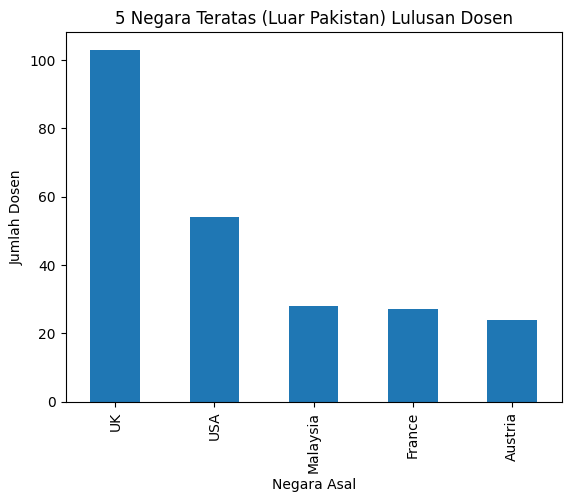

In [47]:
# Barplot
top_negara.plot(kind='bar', title='5 Negara Teratas (Luar Pakistan) Lulusan Dosen')
plt.ylabel('Jumlah Dosen')
plt.show()

##  7. Berapa banyak dosen yang merupakan profesor dan asisten profesor?

In [49]:
# Hitung jumlah dosen Profesor dan Asisten Profesor
jumlah_profesor = mydata[mydata['Kategori_Jabatan'] == 'Professor'].shape[0]
jumlah_asisten = mydata[mydata['Kategori_Jabatan'] == 'Assistant Professor'].shape[0]

# Cetak hasil
print("Jumlah Professor:", jumlah_profesor)
print("Jumlah Assistant Professor:", jumlah_asisten)
print("Total:", jumlah_profesor + jumlah_asisten)

Jumlah Professor: 208
Jumlah Assistant Professor: 738
Total: 946


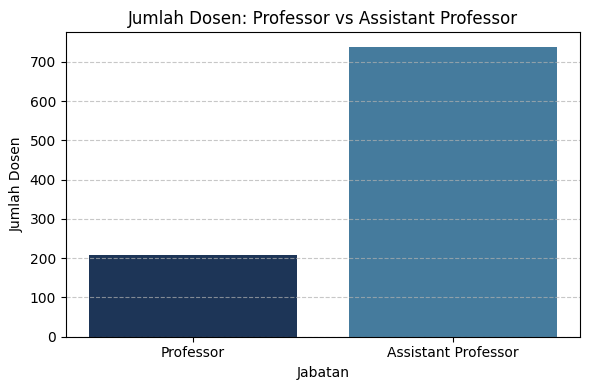

In [50]:
import matplotlib.pyplot as plt

# Hitung jumlah dosen berdasarkan kategori jabatan
jumlah_profesor = mydata[mydata['Kategori_Jabatan'] == 'Professor'].shape[0]
jumlah_asisten = mydata[mydata['Kategori_Jabatan'] == 'Assistant Professor'].shape[0]

# Siapkan data untuk grafik
jabatan = ['Professor', 'Assistant Professor']
jumlah = [jumlah_profesor, jumlah_asisten]

# Buat diagram batang
plt.figure(figsize=(6, 4))
plt.bar(jabatan, jumlah, color=['#1d3557', '#457b9d'])
plt.title('Jumlah Dosen: Professor vs Assistant Professor')
plt.ylabel('Jumlah Dosen')
plt.xlabel('Jabatan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 8. Apakah ada kaitan antara tahun kelulusan dan jabatan akademik dosen?

<ipython-input-56-28ed13f3b8db>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mydata_tahun_jabatan, x='Kategori_Jabatan', y='Tahun Lulus', palette='coolwarm')


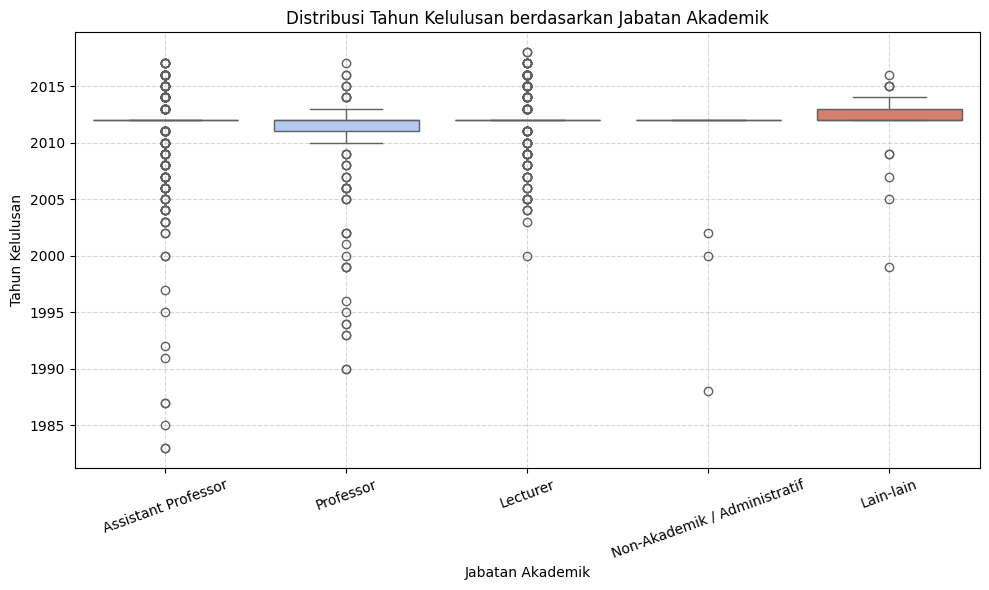

In [56]:
# Pastikan hanya data dengan tahun kelulusan dan jabatan yang tidak null
mydata_tahun_jabatan = mydata[['Tahun Lulus', 'Kategori_Jabatan']].dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=mydata_tahun_jabatan, x='Kategori_Jabatan', y='Tahun Lulus', palette='coolwarm')

plt.title('Distribusi Tahun Kelulusan berdasarkan Jabatan Akademik')
plt.xlabel('Jabatan Akademik')
plt.ylabel('Tahun Kelulusan')
plt.xticks(rotation=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [57]:
mydata

,Nomor Seri,Nama Pengajar,Universitas,Departemen,Provinsi,Jabatan,Gelar Tertinggi,Lulusan,Negara Asal,Tahun Lulus,Bidang Keahlian,Kategori_Departemen,Kategori_Jabatan,Kategori Gelar
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Tidak diketahui,France,2012,"P2P Networks, Telecommunication Systems",Computer Science,Assistant Professor,S3 (Doktor)
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,Tidak diketahui,France,2012,"Wireless Networks, Telecommunication Systems, ...",Computer Science,Professor,S3 (Doktor)
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,Software Engineering & DBMS,Computer Science,Assistant Professor,S3 (Doktor)
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,Tidak diketahui,Pakistan,2012,Operating System & DBMS,Computer Science,Assistant Professor,S2 (Magister)
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,2012,DBMS,Computer Science,Assistant Professor,S3 (Doktor)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,Dr. Masroor Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Tidak diketahui,Pakistan,2012,"High Performance Computing, Computational Scie...",Computer Science,Professor,S3 (Doktor)
1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012,"Digital Multimedia Systems, Video Compression ...",Computer Science,Assistant Professor,S3 (Doktor)
1978,1979,Dr. Asif Khan,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Tidak diketahui,Austria,2012,"Unmanned Aerial Vehicle (UAV), Multirobot Syst...",Computer Science,Assistant Professor,S3 (Doktor)
1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,2012,"Medical Image Processing and Analysis, Digital...",Computer Science,Assistant Professor,S3 (Doktor)
